# Dataset

In [13]:
import pandas as pd
data=pd.read_csv("C:\\Users\\chakr\\Downloads\\highest_totals.csv")
print(data)
print(data.head(11))

            Team  Score    RR  Inns        Ground
0   South Africa    428  8.56     1         Delhi
1          India    410  8.20     1     Bengaluru
2    New Zealand    401  8.02     1     Bengaluru
3   South Africa    399  7.98     1      Wankhede
4      Australia    399  7.98     1         Delhi
..           ...    ...   ...   ...           ...
91   Afghanistan    139  4.00     2       Chennai
92       England    129  3.70     2       Lucknow
93   Netherlands     90  4.28     2         Delhi
94  South Africa     83  3.05     2  Eden Gardens
95     Sri Lanka     55  2.79     2      Wankhede

[96 rows x 5 columns]
            Team  Score    RR  Inns      Ground
0   South Africa    428  8.56     1       Delhi
1          India    410  8.20     1   Bengaluru
2    New Zealand    401  8.02     1   Bengaluru
3   South Africa    399  7.98     1    Wankhede
4      Australia    399  7.98     1       Delhi
5          India    397  7.94     1    Wankhede
6      Australia    388  7.86     1  Dhar

# Statistical Analysis through Graphical Method

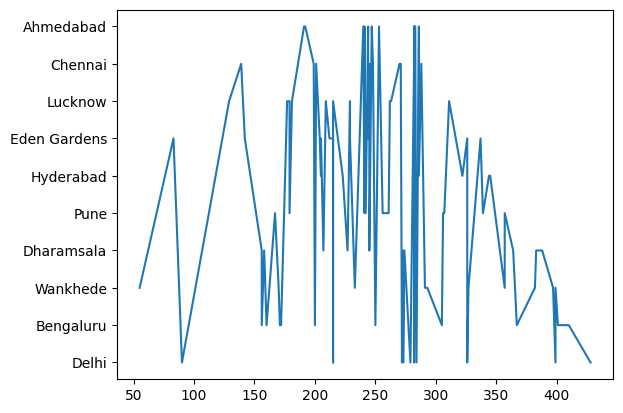

In [31]:
import matplotlib.pyplot as pt
x=data["Score"]
y=data["Team"]
pt.plot(x,y)
pt.show()

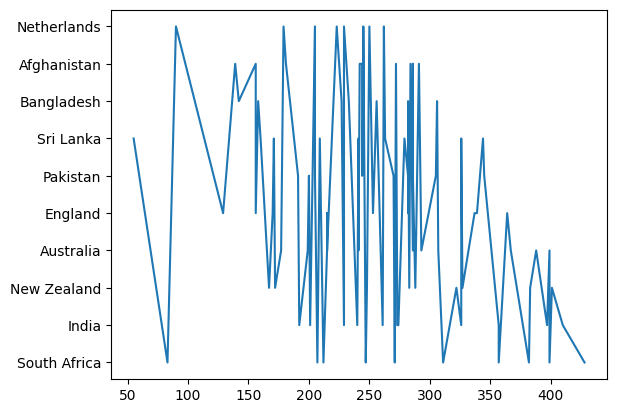

In [32]:
import matplotlib.pyplot as pt
x=data["Score"]
y=data["Team"]
pt.plot(x,y)
pt.show()

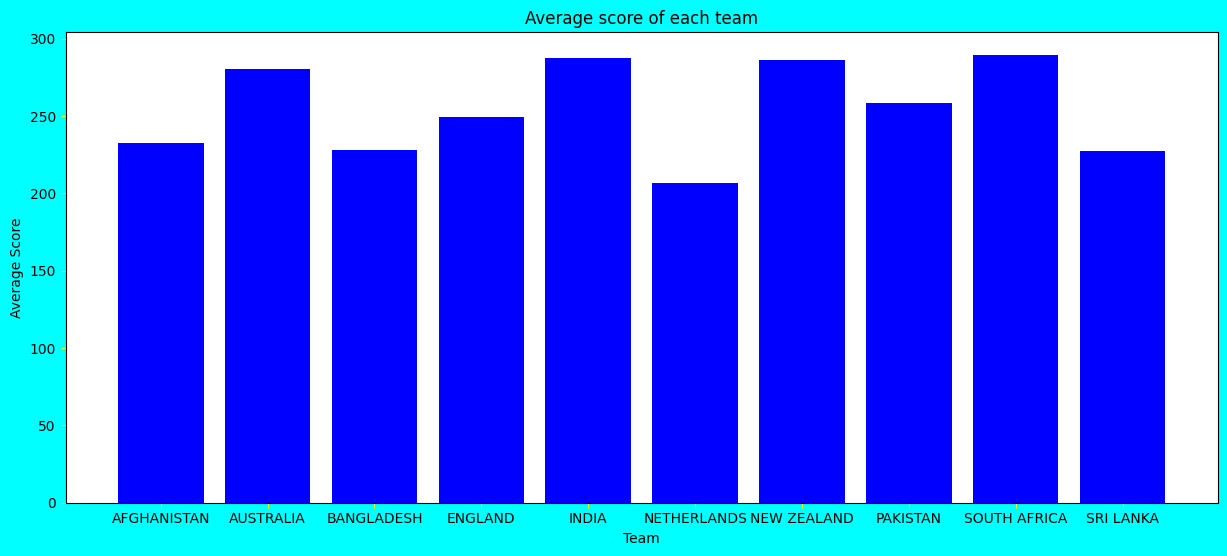

In [115]:
import matplotlib.pyplot as pt
'''def addlabels(x,y):
    for i in range(len(x)):
        pt.text(i,y[i],y[i])'''
figure1=pt.figure()
rect=figure1.patch
rect.set_facecolor('Cyan')
d=data.groupby("Team")
#print(d)
#print(d.size())
Sum1=d.sum()
#print(Sum1)
Team=["AFGHANISTAN","AUSTRALIA","BANGLADESH","ENGLAND","INDIA","NETHERLANDS","NEW ZEALAND","PAKISTAN","SOUTH AFRICA","SRI LANKA"]
Average1=Sum1["Score"]/d.size()
#print(Average1)
pt.bar(Team,Average1,align="center",color='Blue')
#addlabels(Team,Average1)
pt.xlabel("Team",color="black")
pt.ylabel("Average Score",color="black")
pt.title("Average score of each team",color="black")
pt.tick_params(axis="x",color="yellow")
pt.tick_params(axis="y",color="yellow")
pt.subplots_adjust(left=0.00005,right=1.8,top=1,bottom=0.02,wspace=0.2,hspace=0.7) #top>=bottom and right>left(not even equal to)
pt.show()

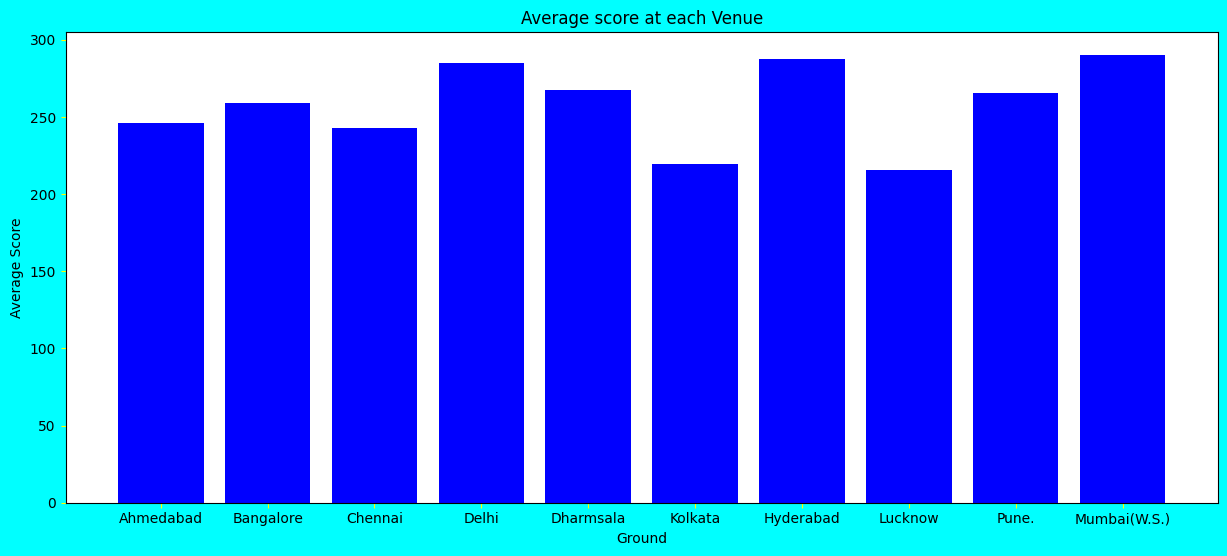

In [7]:
import matplotlib.pyplot as pt
figure1=pt.figure()
rect=figure1.patch
rect.set_facecolor('Cyan')
q=data.groupby("Ground")
#print(q)
#print(q.size())
Sum2=q.sum()
#print(Sum2)
Ground_City=["Ahmedabad","Bangalore","Chennai","Delhi","Dharmsala","Kolkata","Hyderabad","Lucknow","Pune.","Mumbai(W.S.)"]
Average2=Sum2["Score"]/q.size()
#print(Average)
pt.bar(Ground_City,Average2,align="center",color='Blue')
pt.xlabel("Ground",color="black")
pt.ylabel("Average Score",color="black")
pt.title("Average score at each Venue",color="black")
pt.tick_params(axis="x",color="yellow")
pt.tick_params(axis="y",color="yellow")
pt.subplots_adjust(left=0.00005,right=1.8,top=1,bottom=0.02,wspace=0.2,hspace=0.7) #top>=bottom and right>left(not even equal to)
pt.show()

# Prediction through Neural Networking and MLPC

In [104]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier # Multi Layer Perception
from sklearn.preprocessing import LabelEncoder

data=pd.read_csv("C:\\Users\\chakr\\OneDrive\\Desktop\\Jupyter Notebook\\highest_totals.csv")
x=int(input("Enter choice(0/1/2): "))
label_encoder=LabelEncoder()
# PART 1- Predicting Team on the basis of score and ground
if x==0:
    encoded_ground_outcome=label_encoder.fit_transform(data["Ground"])
    encoded_team_outcome=label_encoder.fit_transform(data["Team"])

    data.insert(3,"Encoded Ground",encoded_ground_outcome)
    data.insert(3,"Encoded Team",encoded_team_outcome)

    df=data.pop("Team")
    fd=data.pop("Ground")

    X=data.drop("Encoded Team",axis=1)
    y=data["Encoded Team"]

    clsf=MLPClassifier(hidden_layer_sizes=(100,50),activation='identity',max_iter=50,random_state=42)#seeding(random_state)
    clsf.fit(X,y)
    """ Ahmedabad-0, Bangalore-1, Chennai-2, Delhi-3, Dharmsala-4, Kolkata-5, Hyderabad-6, Lucknow-7, Pune-8, Mumbai-9  """
    g=int(input("Enter Ground-"))
    s=int(input("Enter Score-"))
    new_data=[[g,s]]

    predicted_outcome=clsf.predict(new_data)
    predicted_outcome_decode=label_encoder.inverse_transform(predicted_outcome)

    print("Predicted Team: {}".format(predicted_outcome_decode[0]))
# PART 2- Predicting Ground on the basis of score and team
elif x==1:
    encoded_team_outcome=label_encoder.fit_transform(data["Team"])
    encoded_ground_outcome=label_encoder.fit_transform(data["Ground"])
   
    data.insert(3,"Encoded Team",encoded_team_outcome)
    data.insert(3,"Encoded Ground",encoded_ground_outcome)

    df=data.pop("Ground")
    fd=data.pop("Team")

    X=data.drop("Encoded Ground",axis=1)
    y=data["Encoded Ground"]
    
    clsf=MLPClassifier(hidden_layer_sizes=(100,50),activation='identity',max_iter=50,random_state=42)#seeding(random_state)
    clsf.fit(X,y)
    """ Afghanistan-0, Australia-1, Bangladesh-2, England-3, India-4, Netherlands-5, New Zealand-6, Pakistan-7, South Africa-8, Sri Lanka-9  """
    t=int(input("Enter Team-"))
    s=int(input("Enter Score-"))
    new_data=[[t,s]]

    predicted_outcome=clsf.predict(new_data)
    predicted_outcome_decode=label_encoder.inverse_transform(predicted_outcome)

    print("Predicted Ground: {}".format(predicted_outcome_decode[0]))
# PART 3- Predicting Score on the basis of team and ground
elif x==2:
    encoded_team_outcome=label_encoder.fit_transform(data["Team"])
    encoded_ground_outcome=label_encoder.fit_transform(data["Ground"])
   
    data.insert(3,"Encoded Team",encoded_team_outcome)
    data.insert(3,"Encoded Ground",encoded_ground_outcome)

    df=data.pop("Ground")
    fd=data.pop("Team")

    X=data.drop("Score",axis=1)
    y=data["Score"]
    
    clsf=MLPClassifier(hidden_layer_sizes=(100,50),activation='identity',max_iter=50,random_state=42)#seeding(random_state)
    clsf.fit(X,y)
    """ Ahmedabad-0, Bangalore-1, Chennai-2, Delhi-3, Dharmsala-4, Kolkata-5, Hyderabad-6, Lucknow-7, Pune-8, Mumbai-9  """
    """ Afghanistan-0, Australia-1, Bangladesh-2, England-3, India-4, Netherlands-5, New Zealand-6, Pakistan-7, South Africa-8, Sri Lanka-9  """
    g=int(input("Enter Ground-"))
    t=int(input("Enter Team-"))
    new_data=[[g,t]] # Ground,Team

    predicted_outcome=clsf.predict(new_data)
    print("Predicted Ground: {}".format(predicted_outcome[0]))
else:
    print("Invalid Input")

Enter choice(0/1/2):  2


C:\Users\chakr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Enter Ground- 4
Enter Team- 4


Predicted Ground: 357


C:\Users\chakr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
